In [8]:
using HorizonSideRobots
using PyPlot; pygui(true)
h, w = 10, 10
r = Robot(h, w)
show!(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


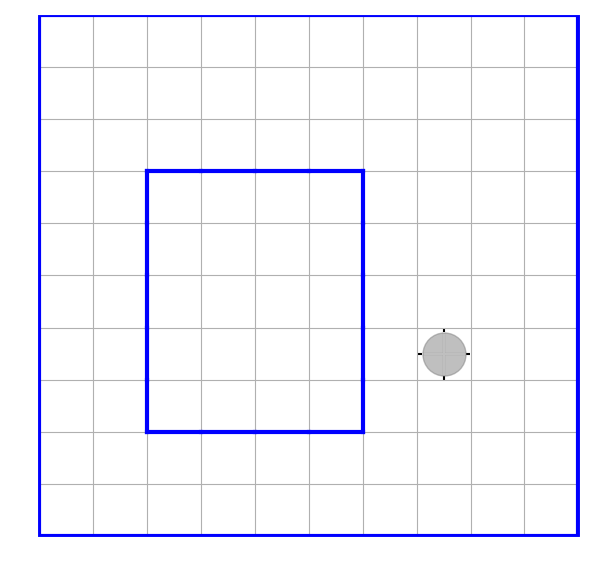

In [9]:
show(r)

In [10]:
path = []

function do_it(side::HorizonSide, a::Int64)
    res = [mod(Int(side)+2, 4) for i in (1:a)]
    return res
end

function inverse(side)
    return HorizonSide(mod(Int(side)+2, 4))
end

function check(side)
    return isborder(r, side)
end

function check_inv(side)
    return !isborder(r, side)
end

function move_till_border(f, g, r, direction_side, check_side)
    a = 0
    b = false
    while !isborder(r, direction_side)
        move!(r, direction_side)
        a += 1
        g(r)
        if f(check_side)
            b = true
            break
        end
    end
    return (a, b)
end

function go_back(r, a)
    for side in a
        move!(r, HorizonSide(side))
    end
end

nth(x) = false

append!(path, do_it(Sud, move_till_border(nth, nth, r, Sud, Nord)[1]))
append!(path, do_it(West, move_till_border(nth, nth, r, West, Ost)[1]))
append!(path, do_it(Sud, move_till_border(nth, nth, r, Sud, Nord)[1]))

side = Nord
flag = move_till_border(check, nth, r, side, Ost)[2]

while !flag
    side = inverse(side)
    move!(r, Ost)
    flag = move_till_border(check, nth, r, side, Ost)[2]
end


putmarker!(r)
move_till_border(check_inv, putmarker!, r, side, Ost)
move!(r, Ost)

putmarker!(r)
move_till_border(check_inv, putmarker!, r, Ost, inverse(side))
move!(r, inverse(side))

putmarker!(r)
move_till_border(check_inv, putmarker!, r, inverse(side), West)
move!(r, West)

putmarker!(r)
move_till_border(check_inv, putmarker!, r, West, side)
move!(r, side)

move_till_border(nth, nth, r, Sud, Nord)
move_till_border(nth, nth, r, West, Ost)
move_till_border(nth, nth, r, Sud, Nord)

go_back(r, reverse(path))


┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


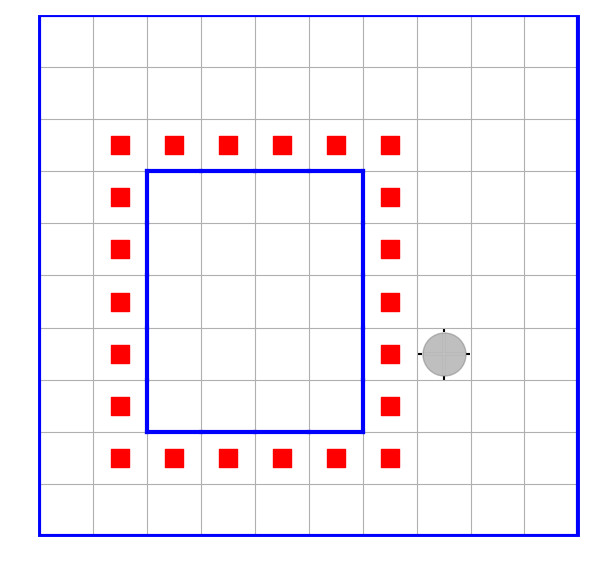

In [11]:
show(r)